# Covid 19 Data Analysis with Python

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r'covid.csv')

In [3]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [4]:
df.shape

(321, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [6]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [8]:
df.dropna( inplace = True )

In [11]:
df.isnull().sum()

Date         0
State        0
Region       0
Confirmed    0
Deaths       0
Recovered    0
dtype: int64

### Region wise Total Cases/Deaths/Recovered

In [14]:
df.groupby('Region')[['Confirmed','Deaths', 'Recovered']].sum()

,Confirmed,Deaths,Recovered
Region,,,
Australia,6752,91,5715
Canada,52865,3155,20327
Denmark,198,0,192
France,1450,34,890
Hong Kong,1037,4,830
Macau,45,0,34
Mainland China,82862,4633,77610
Netherlands,196,16,119
UK,1220,69,857


### Highest and Lowest region with confirmed cases

In [19]:
df.groupby('Region')['Confirmed'].sum().sort_values( ascending = False )

Region
US                1039909
Mainland China      82862
Canada              52865
Australia            6752
France               1450
UK                   1220
Hong Kong            1037
Denmark               198
Netherlands           196
Macau                  45
Name: Confirmed, dtype: int64

In [28]:
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 181 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       140 non-null    datetime64[ns]
 1   State      140 non-null    object        
 2   Region     140 non-null    object        
 3   Confirmed  140 non-null    int64         
 4   Deaths     140 non-null    int64         
 5   Recovered  140 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 7.7+ KB


In [29]:
df['Year'] = df['Date'].dt.year

In [30]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered,Year
181,2020-04-29,Alabama,US,6912,256,0,2020
182,2020-04-29,Alaska,US,355,9,0,2020
183,2020-04-29,Alberta,Canada,5165,87,0,2020
184,2020-04-29,Anguilla,UK,3,0,3,2020
185,2020-04-29,Anhui,Mainland China,991,6,985,2020


In [33]:
df1 = df.groupby('Region')['Deaths'].sum()
df1

Region
Australia            91
Canada             3155
Denmark               0
France               34
Hong Kong             4
Macau                 0
Mainland China     4633
Netherlands          16
UK                   69
US                60967
Name: Deaths, dtype: int64

In [37]:
sns.set()

<Axes: xlabel='Region'>

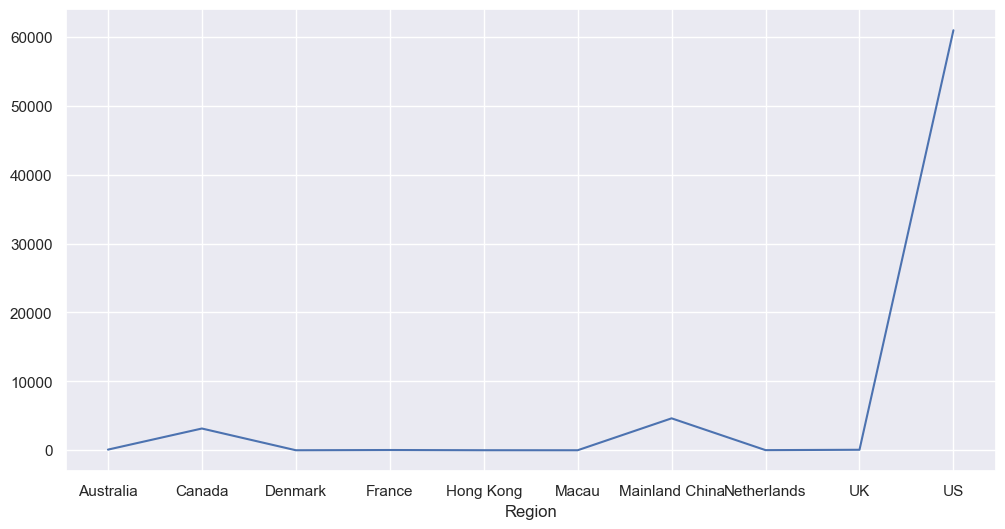

In [46]:
plt.figure(figsize=(12,6))
sns.lineplot( x = df1.index, y = df1.values, data = df1)

In [118]:
df2 = df.groupby('Region')[['Confirmed', 'Recovered']].sum()
df2

,Confirmed,Recovered
Region,,
Australia,6752,5715
Canada,52865,20327
Denmark,198,192
France,1450,890
Hong Kong,1037,830
Macau,45,34
Mainland China,82862,77610
Netherlands,196,119
UK,1220,857


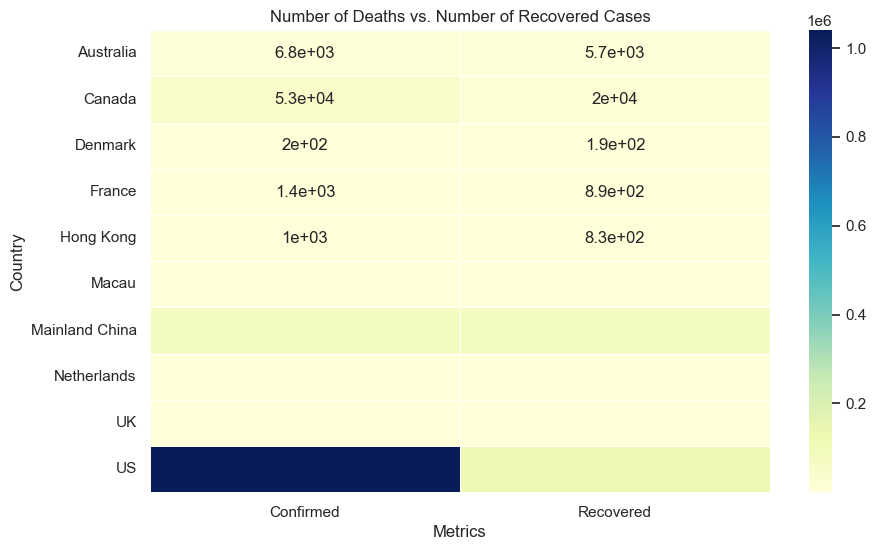

In [61]:

plt.figure(figsize=(10, 6))
sns.heatmap(df2, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title('Number of Deaths vs. Number of Recovered Cases')
plt.xlabel('Metrics')
plt.ylabel('Country')
plt.show()

In [80]:
df2 = df.groupby('Region')['Confirmed'].sum().sort_values( ascending = False ).tail(6)
df2

Region
France         1450
UK             1220
Hong Kong      1037
Denmark         198
Netherlands     196
Macau            45
Name: Confirmed, dtype: int64

<Axes: ylabel='Confirmed'>

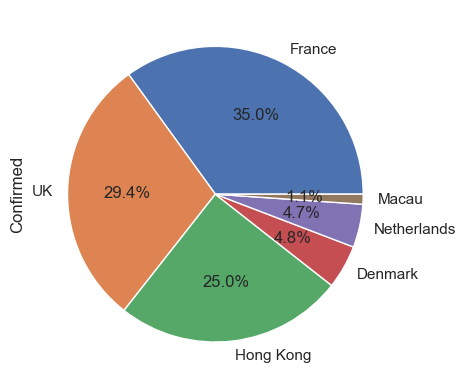

In [81]:
df2.plot(kind = 'pie', autopct = '%2.1f%%')

In [86]:
df3 = df.groupby('Region')['Recovered'].sum().sort_values(ascending = True).head(6)
df3

Region
Macau           34
Netherlands    119
Denmark        192
Hong Kong      830
UK             857
France         890
Name: Recovered, dtype: int64

<Axes: xlabel='Region'>

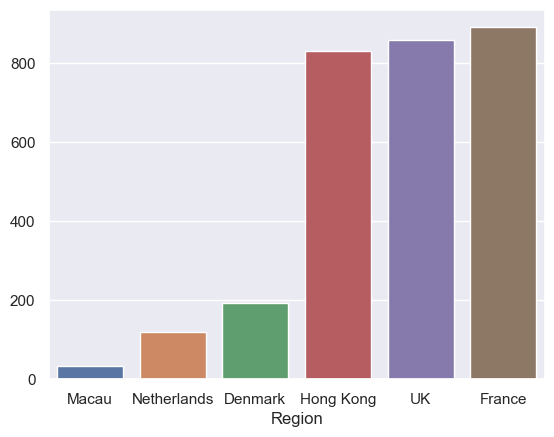

In [87]:
sns.barplot(x = df3.index, y = df3.values)

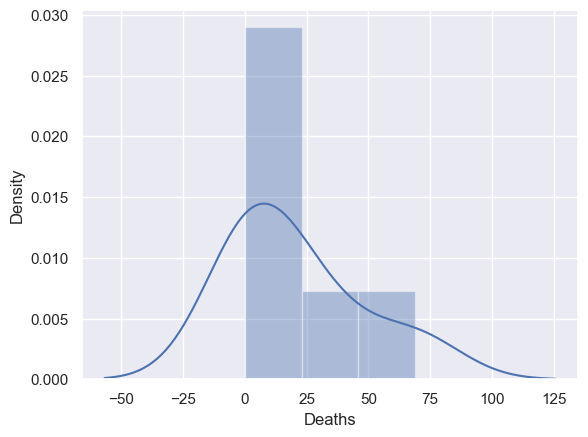

In [117]:
df4 = df.groupby('Region')['Deaths'].sum().sort_values(ascending = True).head(6)
sns.distplot(df4)
plt.show()